## No show project

# Description of Data:
this notebook aims for knowing what is the reason for people missing their appointment.

**these are the columns that the data set contain :**

01 - PatientId : Identification of a patient

02 - AppointmentID : Identification of each appointment

03 - Gender:Male or Female.Female is the greater proportion, woman takes way more care of they health in comparison to man 

04 - DataMarcacaoConsulta : The day of the actuall appointment, when they have to visit the doctor.

05 - DataAgendamento : The day someone called or registered the appointment, this is before appointment of course.

06 - Age : How old is the patient.

07 - Neighbourhood : Where the appointment takes place.

08 - Scholarship True of False 

09 - Hipertension : True or False

10 - Diabetes : True or False

11 - Alcoholism : True or False

12 - Handcap : True or False

13 - SMS_received : 1 or more messages sent to the patient.

14 - No-show : True or False. **--> the target variable**

###  By asking some questions after analyzing the data set we can find the reason for the absent :
1- who cares about their health more men or women ?
2-what about Scholarship ?
3-Does sending SMS message affects the attendance ?
4-Does the neighborhood play a role ?
5-Does the disease type affect the patient's show up ?
6-Does the age plays role in showing up ?


## Table of Contents
<ul>
<li><a href="#investigating  dataset">investigating the dataset</a></li>
<li><a href="#wrangling">wrangling data</a></li>
<li><a href="#questions">the reason for NO-Show</a></li>
<li><a href="#conclusion">Conclusion</a></li>
</ul>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='investigating  dataset'></a>
## investigating the dataset

In [2]:
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv',na_values=[' ','N\A','?','xx','NA','!'])
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


**hmmm min age = -1 !! what is the non existing baby preparing for the future :), will solve it later **

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

** we 've 62299 patient but there r 110527 appointment that's mean almost 2 appointments for every patient**

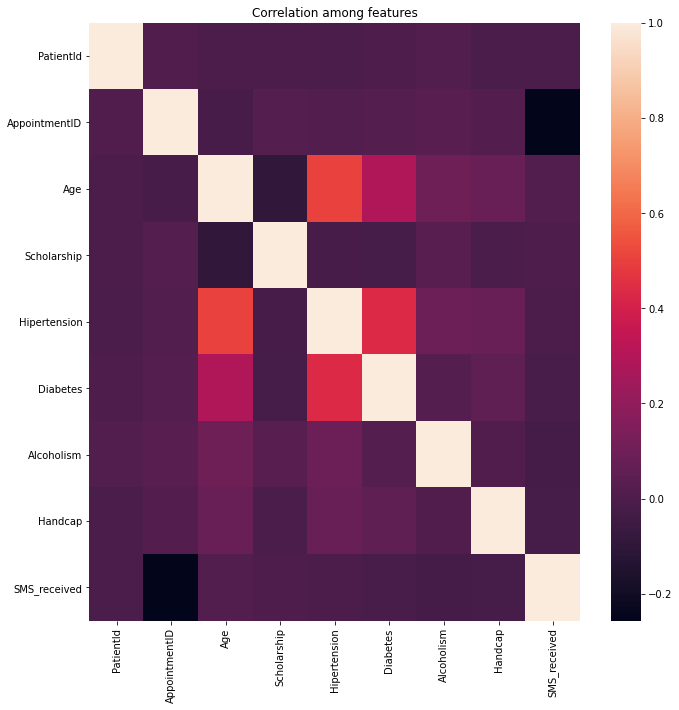

In [7]:
Correlation_Matrix = df.corr()
f, ax = plt.subplots(figsize=(11, 11))
sns.heatmap(Correlation_Matrix)
plt.title('Correlation among features');
plt.show()

we can see correlations between age, diabetes and hipertension which 'll  scientifically help us
other correlations aren't that strong like these so initially we can say the age and the diseases affects no-show 

<a id='wrangling'></a>
# wrangling data
*missing and duplicated data

*dropping non useful features

*solving some features issues

*renaming a/some feature/s

<a id='missing and duplicated data'></a>
#### missing and duplicated data

In [8]:
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

no missing data , good

In [9]:
df.duplicated().sum()

0

no duplicated data also 

In [10]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

**dropping non useful features :**

In [11]:
# droping PatientId & AppointmentID even if their unique values tells us that  almost every patient has 2 appointment 
#but they them self won't help beside this 
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

**dealing with the age problem :**

In [12]:
# as for age we have one tiny problem 
df['Age'].min()

-1

In [13]:
#let's solve it
df=df[df['Age']>0]
df['Age'].min()

1

**checking why women get too much attention than men :)**

In [14]:
df['Gender'].value_counts()

F    70118
M    36869
Name: Gender, dtype: int64

gender column looks good and most of the people are women "of course they care about their health to take ours :( "

In [15]:
df['SMS_received'].value_counts()

0    72402
1    34585
Name: SMS_received, dtype: int64

the same for SMS

In [16]:
df[(df['Gender']=='F') & (df['SMS_received']==1)]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
15,F,2016-04-26T08:47:27Z,2016-04-29T00:00:00Z,15,NOVA PALESTINA,0,0,0,0,0,1,No
18,F,2016-04-26T10:54:18Z,2016-04-29T00:00:00Z,30,NOVA PALESTINA,1,0,0,0,0,1,No
33,F,2016-04-25T15:01:04Z,2016-04-29T00:00:00Z,38,SÃO CRISTÓVÃO,1,0,0,0,0,1,No
48,F,2016-04-26T07:19:49Z,2016-04-29T00:00:00Z,58,SÃO CRISTÓVÃO,0,0,0,0,0,1,Yes
49,F,2016-03-31T17:11:17Z,2016-04-29T00:00:00Z,27,GRANDE VITÓRIA,0,0,0,0,0,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [17]:
df[(df['Gender']=='M') & (df['SMS_received']==1)]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
11,M,2016-04-26T08:44:12Z,2016-04-29T00:00:00Z,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
22,M,2016-04-25T13:29:16Z,2016-04-29T00:00:00Z,13,CONQUISTA,0,0,0,0,0,1,Yes
25,M,2016-04-26T15:04:17Z,2016-04-29T00:00:00Z,46,CONQUISTA,0,1,0,0,0,1,No
38,M,2016-04-20T15:54:18Z,2016-04-29T00:00:00Z,85,SÃO CRISTÓVÃO,0,1,0,0,0,1,No
46,M,2016-04-25T12:44:36Z,2016-04-29T00:00:00Z,58,SÃO CRISTÓVÃO,0,1,0,1,0,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...
110433,M,2016-04-27T09:15:08Z,2016-06-01T00:00:00Z,63,RESISTÊNCIA,0,0,1,0,0,1,No
110435,M,2016-06-03T07:48:03Z,2016-06-08T00:00:00Z,8,RESISTÊNCIA,0,0,0,0,0,1,No
110442,M,2016-05-16T14:41:52Z,2016-06-06T00:00:00Z,8,RESISTÊNCIA,0,0,0,0,0,1,Yes
110445,M,2016-05-11T10:54:44Z,2016-06-06T00:00:00Z,6,RESISTÊNCIA,0,0,0,0,0,1,No


**even women gets SMS more that men ,this is not fair :(**

**solving handcap little issue :**

In [18]:
# handcap is a feature of 0 or 1 based on the data description ,so am not sure if i should drop the rest or  what to do , doing so reduces the data values 
df['Handcap'].value_counts()

0    104747
1      2041
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [19]:
# there is only 199 value , hmmm dunno 'll just remove 'em
df[df['Handcap']>1]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
946,M,2016-04-14T09:26:08Z,2016-04-29T00:00:00Z,94,BELA VISTA,0,1,1,0,2,1,No
1665,M,2016-03-30T09:16:41Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,1,No
1666,M,2016-03-30T09:16:41Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,0,No
2071,M,2016-04-29T10:08:48Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,0,No
2091,F,2016-04-29T08:13:59Z,2016-04-29T00:00:00Z,11,ANDORINHAS,0,0,0,0,2,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
108376,F,2016-06-01T08:48:28Z,2016-06-07T00:00:00Z,44,ROMÃO,0,1,1,0,2,1,No
109484,M,2016-05-31T11:45:57Z,2016-06-02T00:00:00Z,64,DA PENHA,0,1,1,0,2,0,No
109733,F,2016-06-03T16:11:00Z,2016-06-07T00:00:00Z,34,JUCUTUQUARA,0,0,0,0,2,1,No
109975,M,2016-06-02T16:07:36Z,2016-06-06T00:00:00Z,39,PRAIA DO SUÁ,1,0,0,0,2,1,No


In [20]:
df=df[df['Handcap']<=1]

In [21]:
df['Handcap'].value_counts()

0    104747
1      2041
Name: Handcap, dtype: int64

**i will rename NO-show column , why ? cuz i said so :)**

In [22]:
df.rename(columns={'No-show':'noshow'},inplace=True)

**checking for the rest of the data**

In [23]:
df['Scholarship'].value_counts()

0    95997
1    10791
Name: Scholarship, dtype: int64

In [24]:
df['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7586
MARIA ORTIZ                    5563
RESISTÊNCIA                    4224
JARDIM DA PENHA                3846
ITARARÉ                        3405
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

they looks good 

**now time to check for features type**

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106788 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          106788 non-null  object
 1   ScheduledDay    106788 non-null  object
 2   AppointmentDay  106788 non-null  object
 3   Age             106788 non-null  int64 
 4   Neighbourhood   106788 non-null  object
 5   Scholarship     106788 non-null  int64 
 6   Hipertension    106788 non-null  int64 
 7   Diabetes        106788 non-null  int64 
 8   Alcoholism      106788 non-null  int64 
 9   Handcap         106788 non-null  int64 
 10  SMS_received    106788 non-null  int64 
 11  noshow          106788 non-null  object
dtypes: int64(7), object(5)
memory usage: 10.6+ MB


**as for ScheduledDay & AppointmentDay they are dates not strings**

In [26]:
df['ScheduledDay']= pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']= pd.to_datetime(df['AppointmentDay'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106788 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          106788 non-null  object             
 1   ScheduledDay    106788 non-null  datetime64[ns, UTC]
 2   AppointmentDay  106788 non-null  datetime64[ns, UTC]
 3   Age             106788 non-null  int64              
 4   Neighbourhood   106788 non-null  object             
 5   Scholarship     106788 non-null  int64              
 6   Hipertension    106788 non-null  int64              
 7   Diabetes        106788 non-null  int64              
 8   Alcoholism      106788 non-null  int64              
 9   Handcap         106788 non-null  int64              
 10  SMS_received    106788 non-null  int64              
 11  noshow          106788 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(7), object(3)
memory usage: 10.6+ MB


<a id='questions'></a>
## the reason for NO-Show

***well visualizing the data can answer us very well  :***

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Scholarship'}>,
        <AxesSubplot:title={'center':'Hipertension'}>],
       [<AxesSubplot:title={'center':'Diabetes'}>,
        <AxesSubplot:title={'center':'Alcoholism'}>,
        <AxesSubplot:title={'center':'Handcap'}>],
       [<AxesSubplot:title={'center':'SMS_received'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

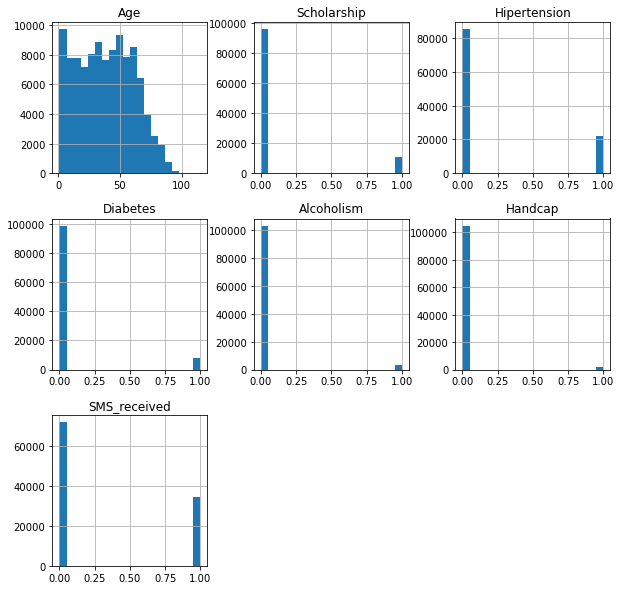

In [27]:
df.hist(figsize=(10,10),bins=20)

all looks good tell now 

**who cares about their health more men or women ?**

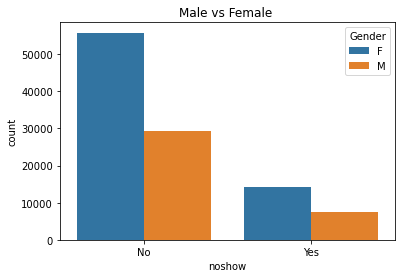

In [28]:
sns.countplot(x ='noshow', hue = "Gender", data = df)
plt.title('Male vs Female ')
plt.show()

well women attends alot more than men

***does sending SMS message affects the attendance ?***

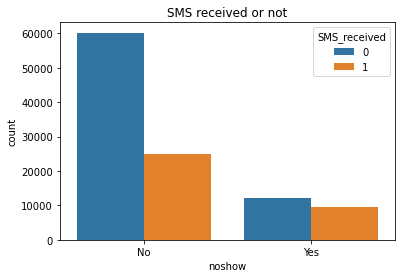

In [29]:
sns.countplot(x ='noshow', hue = "SMS_received", data = df)
plt.title('SMS received or not')
plt.show()

obviously it didn't affect that much ,or maybe it did :)

**Does the neighborhood play a role ?**

Text(0.5, 1.0, 'Attendance in different Neighborhoods')

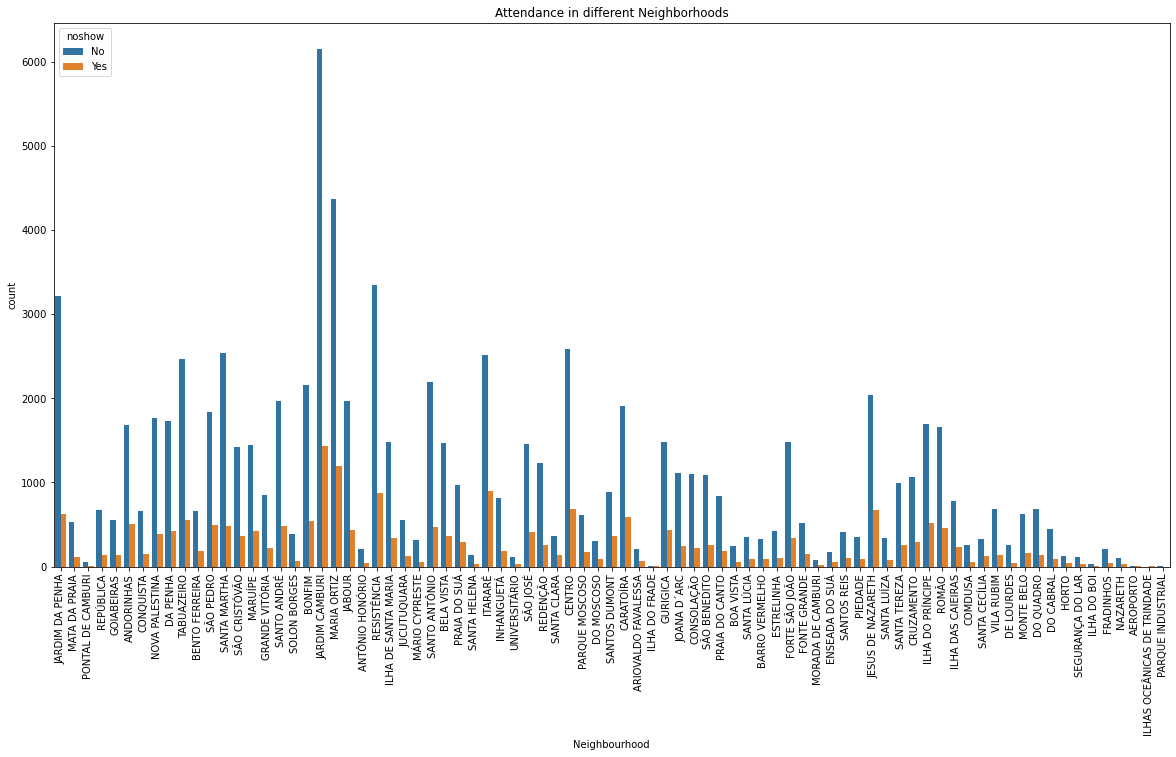

In [30]:
#this figure is silly and not effective but i like it ,so am keeping it :)
# no way i 'll put a title in here, how ?, and i ain't changing it the cocors are looking nice
plt.figure(figsize=(20,10))
sns.countplot(x ="Neighbourhood", hue ='noshow', data = df)
plt.xticks(rotation=90)
plt.title('Attendance in different Neighborhoods')

well most of the people went to the appointment so it's not a major thing to rely on ,but it indicates that their Neighbourhood isn't safe 

***Does the disease type affect the patient's show up ?***

In [31]:
df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'noshow'],
      dtype='object')

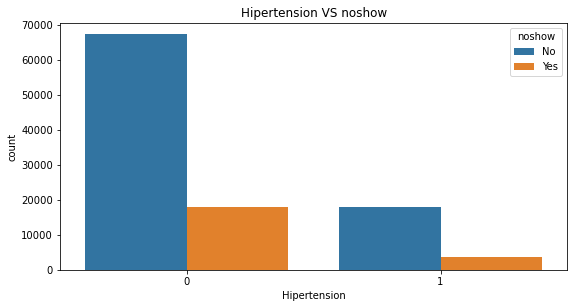

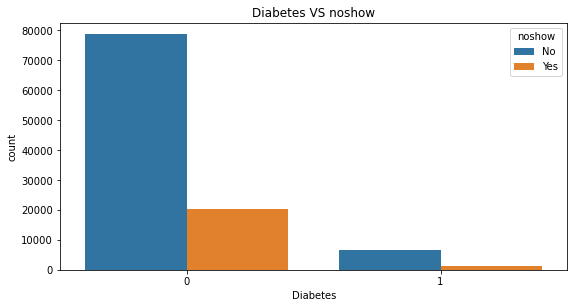

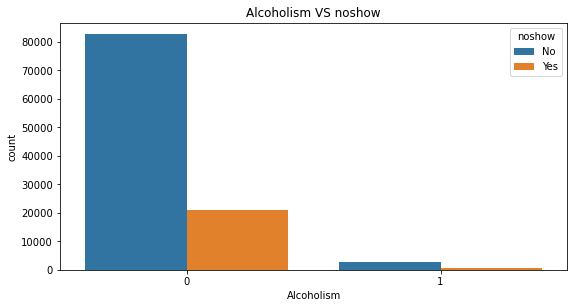

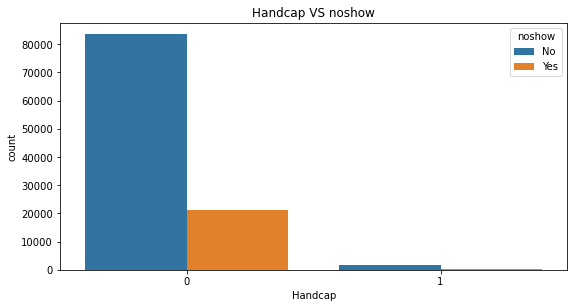

In [32]:
diseases=['Hipertension','Diabetes','Alcoholism','Handcap']
absent='noshow'
def noshowVSall(diseases,absent):
    counter=1
    for x in diseases:
        plt.figure(figsize=(20,10))
        plt.subplot(2,2,counter)
        sns.countplot(df[x],hue=df[absent])
        plt.title(f'{x} VS {absent}')
        counter+=1
noshowVSall(diseases,absent) 

looks like diseases didn't stop people from attending their appointment

***Does the age plays role in showing up ?***

In [33]:
df['Age'].value_counts()

1      2273
52     1741
53     1651
49     1649
56     1634
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 102, dtype: int64

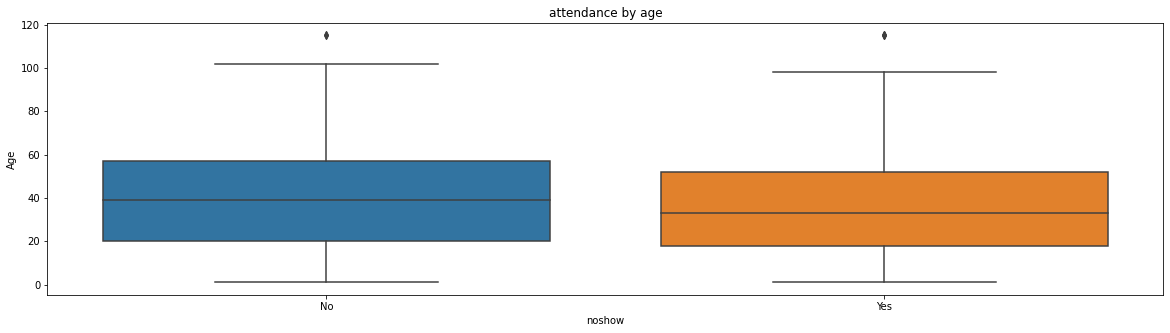

In [34]:
plt.figure(figsize=(20,5))

sns.boxplot(x="noshow", y="Age", data=df)
plt.title('attendance by age')

plt.show()

well it's pretty nigh,but for sure age takes a big turn in the absent 

***what about Scholarship  ?***

<AxesSubplot:title={'center':'will Scholarship affects the absent percentage ?'}, xlabel='noshow', ylabel='count'>

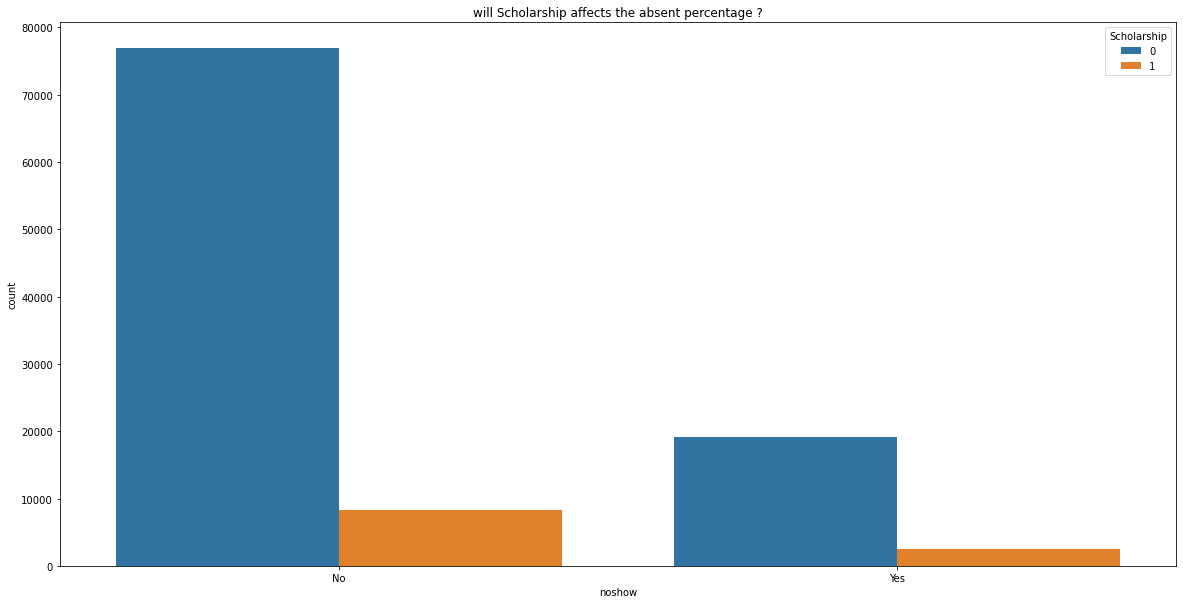

In [35]:
plt.figure(figsize=(20,10))
plt.title('will Scholarship affects the absent percentage ?')
sns.countplot(df['noshow'],hue=df['Scholarship'])

well it's useless alot of people attended without having a Scholarship

<a id='conclusion'></a>
## conclusion :

This analysis had as purpose to perform an analysis of a database of medical consultations, containing more than 100k appointments which approximately 30% of the patients have not attended.
The notebook had the purpose of gather some insights on the possible causes of this missing appointments.

**Dataset limitations :**
1-Some informations are not clear in the description of the dataset and you can only find that missing piece by looking out on the forum on some posts

2-am not sure if (PatientId & AppointmentID) can be used in a better way that dropping em or not

3-There are a few inconsistences on the dataset that need to be verified for example, negative age values and weird scheduling dates

4-my analyse based on some features more than others : The gender  and the age are the most important factors then  Neighbohood and diseases specially(hipertension) come after them as there are some neighborhoods that the diseases are spread alot.

i hope this is the right place to put my sources,otherwise i dunno where to list 'em

***what i used to help me :***

1-https://seaborn.pydata.org/generated/seaborn.heatmap.html

2-https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

3-https://matplotlib.org/tutorials/intermediate/gridspec.html#sphx-glr-tutorials-intermediate-gridspec-py